In [5]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join(os.getcwd(), "datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    return pd.read_csv(os.path.join(housing_path, "housing.csv"))

In [9]:
fetch_housing_data()
housing = load_housing_data()

In [19]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

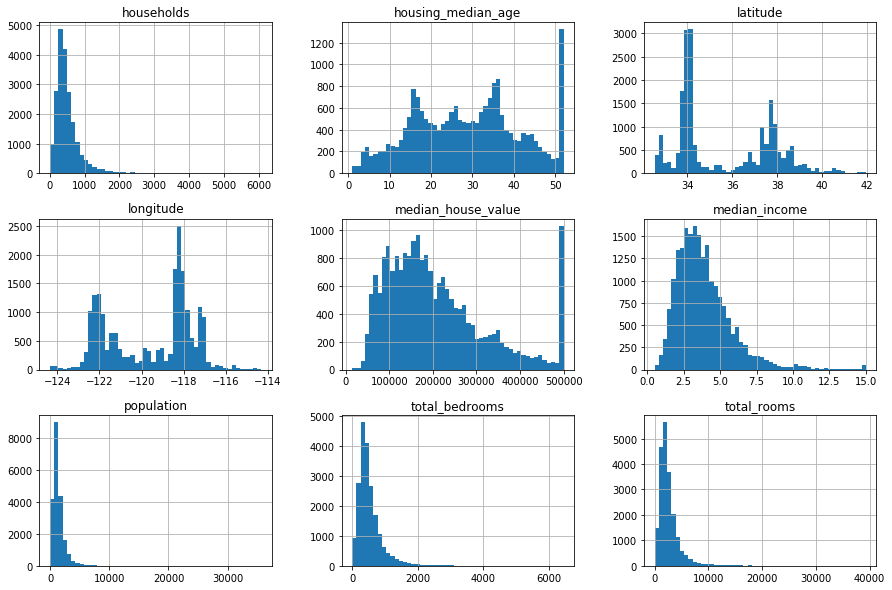

In [29]:
housing.hist(bins=50, figsize=(15,10))
plt.show()

In [30]:
import hashlib

def test_set_check(identifier, test_ratio, hashh):
    return hashh(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_set(data, test_ratio, id_column, hashh=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x: test_set_check(x, test_ratio, hashh))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [31]:
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_set(housing_with_id, 0.2, "index")

In [39]:
from sklearn.model_selection import train_test_split
train_set_sk, test_set_sk = train_test_split(housing, test_size=0.2, random_state=42)

In [44]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

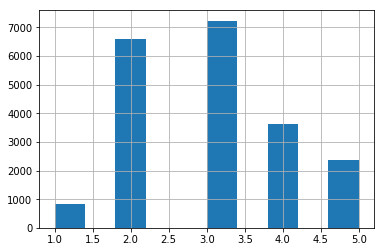

In [46]:
housing["income_cat"].hist()

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [51]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [52]:
for df in (strat_test_set, strat_train_set):
    df.drop("income_cat", axis=1, inplace=True)

In [54]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [55]:
housing_exp = strat_train_set.copy()

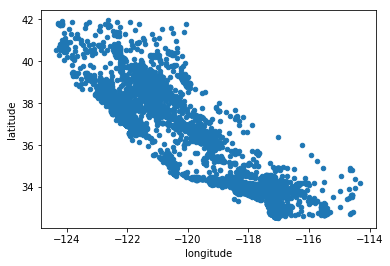

In [58]:
housing_exp.plot(kind='scatter', x='longitude', y='latitude')

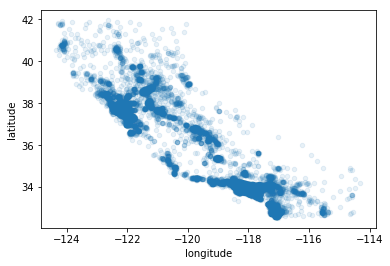

In [59]:
housing_exp.plot(kind='scatter', x='longitude', y='latitude', alpha=.1)

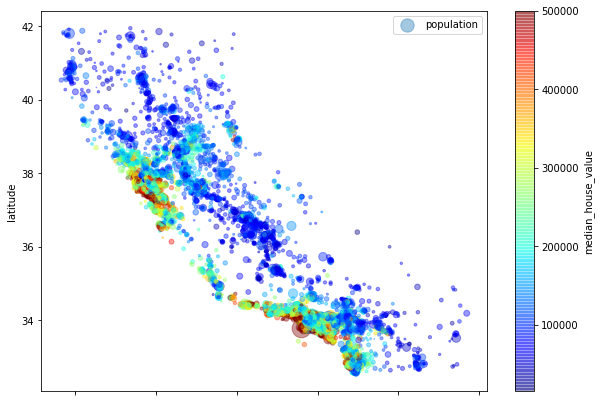

In [70]:
housing_exp.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing["population"] / 100., label='population', figsize=(10,7), c='median_house_value', cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [71]:
corr_matrix = housing_exp.corr()

In [73]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


/home/alduin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7a987a0b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fe7a94a85c0>]], dtype=object)

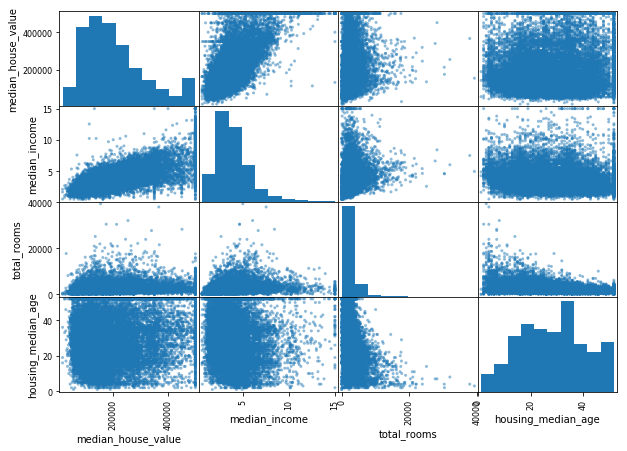

In [75]:
from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_exp[attributes], figsize=(10,7))

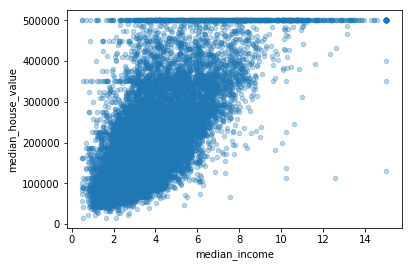

In [82]:
housing_exp.plot(kind='scatter',x='median_income', y='median_house_value', alpha=0.3)

In [83]:
housing_exp["rooms_per_household"] = housing_exp["total_rooms"] / housing_exp["households"]
housing_exp["bedrooms_per_room"] = housing_exp["total_bedrooms"] / housing_exp["total_rooms"]
housing_exp["population_per_household"] = housing_exp["population"] / housing_exp["households"]

In [85]:
corr_matrix = housing_exp.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [86]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [87]:
media_tb = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(media_tb, inplace=True)

In [88]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

In [90]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [91]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [97]:
X = imputer.transform(housing_num)
housing_pr = pd.DataFrame(X, columns=housing_num.columns)

In [98]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing_exp["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [102]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1h = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1h

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [104]:
housing_cat_1h.toarray()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [107]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", Imputer(strategy='median')),
    ("attribs_adder", CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [112]:
from sklearn.base import BaseEstimator, TransformerMixin

In [117]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values


In [118]:
from sklearn.preprocessing import LabelBinarizer

In [119]:
num_attributes = housing_num.columns
cat_attributes = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(attribute_names=num_attributes)),
    ("imputer", Imputer(strategy='median')),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("selector", DataFrameSelector(attribute_names=cat_attributes)),
    ('encoder', LabelBinarizer())
])

In [121]:
from sklearn.pipeline import FeatureUnion

In [123]:
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline), ("cat_pipeline", cat_pipeline)])

housing_prepared = full_pipeline.fit_transform(housing_exp)

In [127]:
housing_prepared.shape

(16512, 16)

In [130]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [135]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

68628.198198489234

In [138]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse

0.0

In [139]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [140]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [141]:
display_scores(tree_rmse_scores)

Scores:  [ 68354.7620441   65062.57811047  72971.41996837  69739.14074309
  70240.408969    74940.4521135   69958.52943956  70238.21482702
  77426.61344512  69853.54879941]
Mean:  70878.566846
Std:  3285.78597729


In [142]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores:  [ 66782.73843989  66960.118071    70347.95244419  74739.57052552
  68031.13388938  71193.84183426  64969.63056405  68281.61137997
  71552.91566558  67665.10082067]
Mean:  69052.4613635
Std:  2731.6740018


In [144]:
from sklearn.ensemble import RandomForestRegressor

ensemble_reg = RandomForestRegressor()
ensemble_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(ensemble_reg, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
ensemble_rmse_scores = np.sqrt(-scores)
display_scores(ensemble_rmse_scores)

Scores:  [ 51985.06231039  48372.95788004  51649.93345203  55032.30531871
  51921.4734769   56877.83781441  50752.0463377   50104.36982432
  55964.41723869  52800.26132341]
Mean:  52546.0664977
Std:  2545.55467635
